In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
import pyeeg
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### 1. Loading each matlab dataset

In [5]:
os.chdir('C:\\Users\\PC\\Desktop\\MSDA\\Spring 2021\\CS 5310 Data Mining\\Lab\\Lab Chapter 3')
Pre = loadmat('Pre')
pre = Pre['data']
         
Med = loadmat('Med')
med = Med['data']

Post = loadmat('Post')
post = Post['data']

In [8]:
pre_transposed = pre.transpose()
med_transposed = med.transpose()
post_transposed = post.transpose()

### 2. Computing Alpha PSIs of 34 channels for all the three states

In [9]:
def Calc_AlphaPSI(array):
    Band = [0.5,4,7,12,30]
    Fs = 1024 
    lst=[]
    num_rows,num_cols = array.shape
    for i in range(int(num_rows/1024)):
        for j in range((num_cols)):
            psi = pyeeg.bin_power(array[i*1024:(i+1)*1024,j],Band,Fs)
            lst.append(psi[0][2])
    lst_reshaped = np.reshape(lst,(-1,34))
    AlphaPSI_df = pd.DataFrame(lst_reshaped)
    return AlphaPSI_df       

In [10]:
prePSI_df = Calc_AlphaPSI(pre_transposed)
medPSI_df = Calc_AlphaPSI(med_transposed)
postPSI_df = Calc_AlphaPSI(post_transposed)
prePSI_df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,10806.485716,178265.336641,115717.377787,75250.382962,17868.283434,4611.895166,10849.541076,5530.816103,73571.863475,14750.718824,...,3522.472558,4281.749136,102896.910629,7590.758281,11132.282448,3663.976503,94220.394538,809651.613774,3910.994604,5150.883810
1,15369.055683,160005.222018,177457.763995,204574.810569,23481.025630,8007.258477,18682.667746,11223.152200,237740.138907,14594.630193,...,6830.176762,4728.613623,192543.379757,13372.125698,14442.816838,6676.799852,180646.129073,292218.975136,4739.058967,6059.301199
2,13100.438101,215119.601314,235190.696739,248116.580667,16236.685915,4689.368455,12030.345534,8622.371705,254559.892280,11186.685638,...,10432.384511,5527.970131,242578.599136,9537.944360,9454.112270,9512.108058,211288.704657,426609.270183,4608.806712,4521.506440
3,23261.692539,116082.158295,138962.894352,173248.090853,12055.918165,6312.824527,8327.481970,7220.940353,188914.919758,18520.595513,...,5917.097039,3719.685551,193002.022910,9850.047430,10285.275070,8591.463771,169587.280927,367313.184149,3931.039035,3920.151693
4,39129.608704,223495.603886,193263.327371,294547.966651,14094.633252,7152.166632,39635.471147,8675.723030,291601.378480,10423.556630,...,11674.734829,4855.810542,247761.844103,12042.406758,10623.625832,7091.769476,328219.587305,451791.424331,4990.082585,4055.842425


### 3. Creating a list of brain activity labels corresponding to each dataframe

In [12]:
pre_label = ['pre']*prePSI_df.shape[0]
med_label = ['med']*medPSI_df.shape[0]
post_label = ['post']*postPSI_df.shape[0]

### 4. Combine 3 dataframes into one by vertical stacking

In [13]:
combined_df = pd.concat([prePSI_df,medPSI_df,postPSI_df],ignore_index=True)
labels = pre_label + med_label + post_label
labels_df = pd.DataFrame(labels)


### 5. Create a correlation coefficient matrix of the alpha PSIs of the 34 channels

In [14]:
corr_df = combined_df.corr()


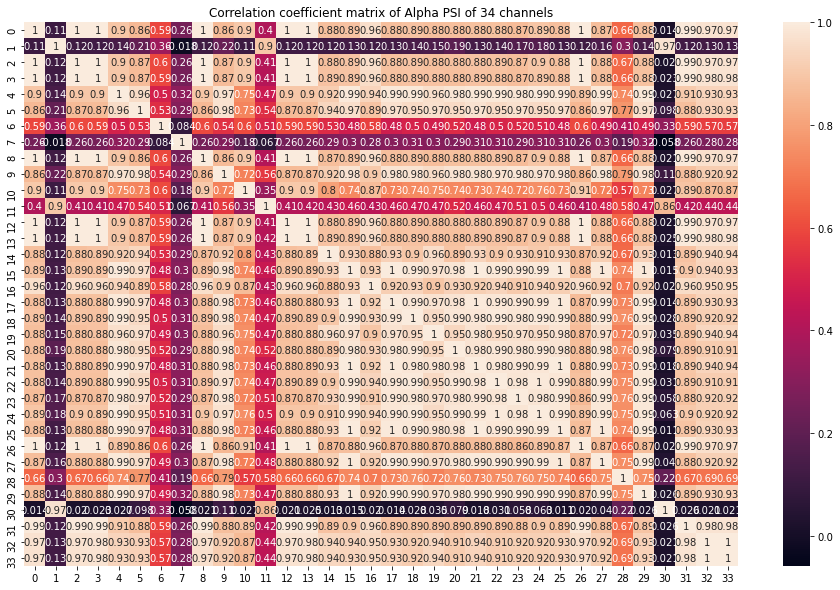

In [15]:
plt.figure(figsize= (16, 10))
sns.heatmap(combined_df.corr(),annot=True)
plt.title("Correlation coefficient matrix of Alpha PSI of 34 channels")
plt.savefig('Correlation coefficient matrix of 34 channels.png')